In [34]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [36]:
df=pd.read_csv("/content/drive/My Drive/DataSet/winequality-red.csv",sep=";")
df.rename(columns=lambda x : x.replace( " ", "_" ),inplace=True)
df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
from sklearn.preprocessing import MinMaxScaler
Sc=MinMaxScaler()
StandarizedDataSet=Sc.fit_transform(df)


Mean -- >  0.2871 Variance -->  0.03700781637454174


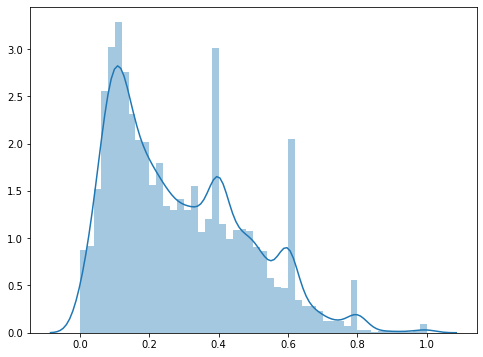

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
plt.figure(figsize=(8,6))
sns.distplot(StandarizedDataSet,norm_hist=True,bins=50)
print("Mean -- > ",round(StandarizedDataSet.mean(),4),"Variance --> ",StandarizedDataSet.var())
## The CLT Works !!! , 
plt.show()
df.head()

In [39]:
NewStandarized=pd.DataFrame(data=StandarizedDataSet,columns=["fixed_acidity","volatile_acidity","citric_acid","residual_sugar"
,"chlorides","free_sulfur_dioxide","total_sulfur_dioxide","density","pH","sulphates","alcohol","quality"])
NewStandarized.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [40]:
NewStandarized.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [41]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.metrics import mean_squared_error

features=NewStandarized.drop("quality",axis=1)
target=NewStandarized["quality"]

x_train,x_test,y_train,y_test=train_test_split(features,target,random_state=52,test_size=0.2)
alpha=[1e-15 , 1e-14 , 1e-12 , 1e-13 , 1e-11 , 1e-10 , 1e-9 , 1e-8 , 1e-7 , 1e-6 , 1e-5 , 1e-4 , 1e-3 , 1e-2 ,1e-1]
alpha.extend(list(np.arange(1,10,0.1)))
hyper_parameter={"alpha":alpha}

ridge=Ridge(random_state=52)
Linear=LinearRegression()
lasso=Lasso(random_state=52)

ridgeregressor=GridSearchCV(ridge,param_grid=hyper_parameter
                            ,cv=10,
                            verbose=True)
LassoRegressor=(GridSearchCV(lasso,param_grid=hyper_parameter
                            ,cv=10
                            ,verbose=True))

Linear.fit(x_train,y_train)

ridgeregressor.fit(x_train,y_train)

LassoRegressor.fit(x_train,y_train)

y_preds=Linear.predict(x_test)
y_predridge=ridgeregressor.predict(x_test)
y_predlasso=LassoRegressor.predict(x_test)




# for i in range(len(df.columns) - 1):
#   print("Label ",df.columns[i] +"\n\t\t" + str(model.coef_[i]) )

print ("\n Ridge best Alpha --> ", ridgeregressor.best_params_, " With Score --> " ,ridgeregressor.best_score_, " And MSE --> ",mean_squared_error(y_test,y_pred=y_predridge ) )
print ("\n Lasso best Alpha --> ", LassoRegressor.best_params_, " With Score --> " ,LassoRegressor.best_score_, " And MSE --> ",mean_squared_error(y_test,y_pred=y_predlasso ) )
print("Regression Mse Score --> ", mean_squared_error(y_true=y_test,y_pred=y_preds) , " And Score ==>  ",Linear.score(x_test,y_test) )

Fitting 10 folds for each of 105 candidates, totalling 1050 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1050 out of 1050 | elapsed:    6.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 10 folds for each of 105 candidates, totalling 1050 fits

 Ridge best Alpha -->  {'alpha': 1.0}  With Score -->  0.339133506304491  And MSE -->  0.01676654147585376

 Lasso best Alpha -->  {'alpha': 0.0001}  With Score -->  0.3388551677446353  And MSE -->  0.016724799630889055
Regression Mse Score -->  0.016719629448274383  And Score ==>   0.35128445911515016


[Parallel(n_jobs=1)]: Done 1050 out of 1050 | elapsed:    7.2s finished


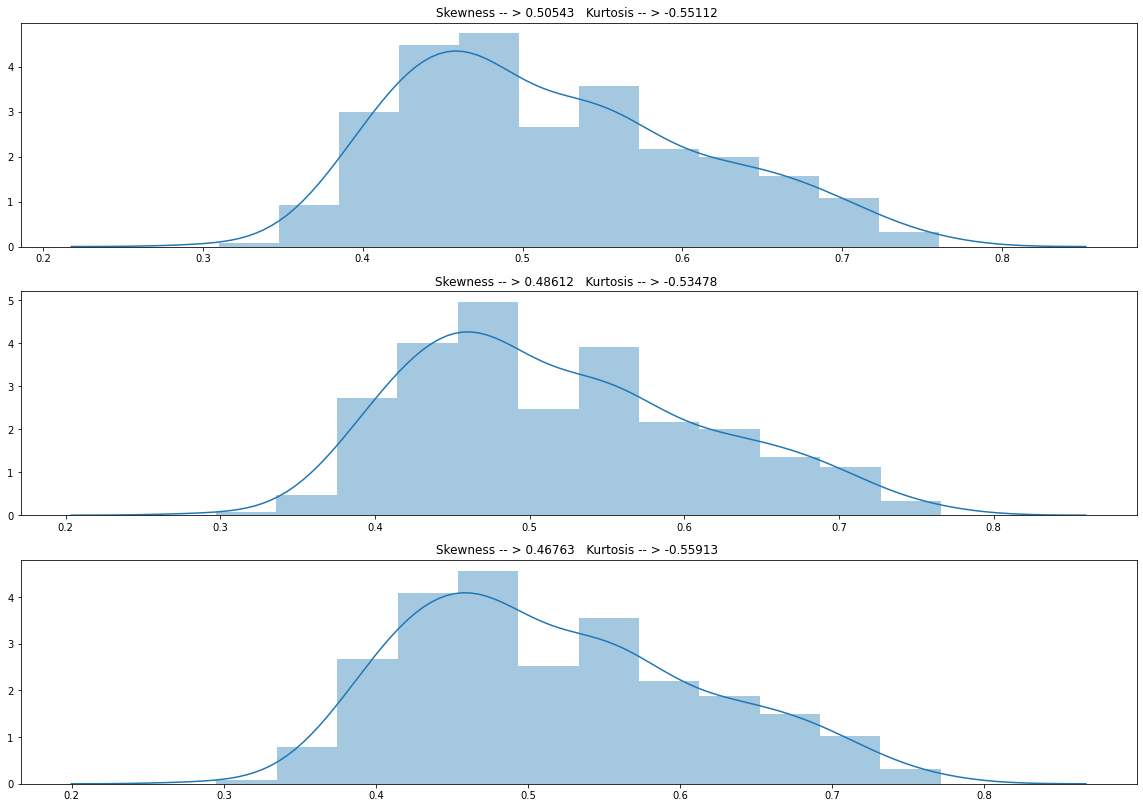

In [42]:
from scipy.stats import kurtosis,skew
f,ax=plt.subplots(figsize=(20,14),nrows=3)
ax[0].set(title="Skewness -- > {}   Kurtosis -- > {} ".format(round(skew(y_predridge),5),round(kurtosis(y_predridge),5)))
ax[1].set(title="Skewness -- > {}   Kurtosis -- > {} ".format(round(skew(y_predlasso),5),round(kurtosis(y_predlasso),5)))
ax[2].set(title="Skewness -- > {}   Kurtosis -- > {} ".format(round(skew(y_preds),5),round(kurtosis(y_preds),5)))
sns.distplot(a=y_predridge,norm_hist=True,ax=ax[0])
sns.distplot(a=y_predlasso,norm_hist=True,ax=ax[1])
sns.distplot(a=y_preds,norm_hist=True,ax=ax[2])




In [0]:
# f,axes=plt.subplots(nrows=1,ncols=len(x_test.columns),sharey=True,constrained_layout=True,figsize=(30,15))
# for i,name  in enumerate(x_test.columns):
#   model.fit(x_train[name].values[:,np.newaxis],y_train) ## Change the Current Dimension with Npnewaxis
#   axes[i].set_title("Best fit line")
#   axes[i].set_xlabel(str(name))
#   axes[i].set_ylabel('SalePrice')
#   axes[i].scatter(x_train[name].values[:,np.newaxis], y_train,color='g')
#   axes[i].plot(x_train[name].values[:,np.newaxis],Linear.predict(x_train[name].values[:,np.newaxis]),color='k')



In [44]:
ridge=Ridge(random_state=52, alpha=9.900000000000007)
Linear=LinearRegression()
lasso=Lasso(random_state=52,alpha = 0.01)
ridge.fit(x_train,y_train)
lasso.fit(x_train,y_train)
Linear.fit(x_train,y_train)

for name,coef in enumerate (ridge.coef_):
  print("Label : ",df.columns[name], "Coef ",coef)
print("sampis Emang \n\n\n")
for name,coef in enumerate (lasso.coef_):
  print("Label : ",df.columns[name], "Coef ",coef)
print("No No \n\n")
for name,coef in enumerate (Linear.coef_):
  print("Label : ",df.columns[name], "Coef ",coef)  
lol=df.drop(["quality"],axis=1)

 

Label :  fixed_acidity Coef  0.0696482592682067
Label :  volatile_acidity Coef  -0.19396960147530173
Label :  citric_acid Coef  0.05142078292062943
Label :  residual_sugar Coef  0.013231872242895716
Label :  chlorides Coef  -0.09394584271472112
Label :  free_sulfur_dioxide Coef  0.023973519806524853
Label :  total_sulfur_dioxide Coef  -0.10666051678350583
Label :  density Coef  -0.08797765643489487
Label :  pH Coef  -0.03302790416833912
Label :  sulphates Coef  0.15193261115658177
Label :  alcohol Coef  0.2938955807934741
sampis Emang 



Label :  fixed_acidity Coef  0.0
Label :  volatile_acidity Coef  -0.0
Label :  citric_acid Coef  0.0
Label :  residual_sugar Coef  -0.0
Label :  chlorides Coef  -0.0
Label :  free_sulfur_dioxide Coef  -0.0
Label :  total_sulfur_dioxide Coef  -0.0
Label :  density Coef  -0.0
Label :  pH Coef  -0.0
Label :  sulphates Coef  0.0
Label :  alcohol Coef  0.10538141538232004
No No 


Label :  fixed_acidity Coef  0.07603380078366212
Label :  volatile_acidity C

In [45]:
ridge.coef_

array([ 0.06964826, -0.1939696 ,  0.05142078,  0.01323187, -0.09394584,
        0.02397352, -0.10666052, -0.08797766, -0.0330279 ,  0.15193261,
        0.29389558])